### R的两个均值比较检验

In [9]:
getwd()
forest_data <- read.table("data/ForestData.txt",header=T)

#forest_data

[1] "/root/linux_tutorial"

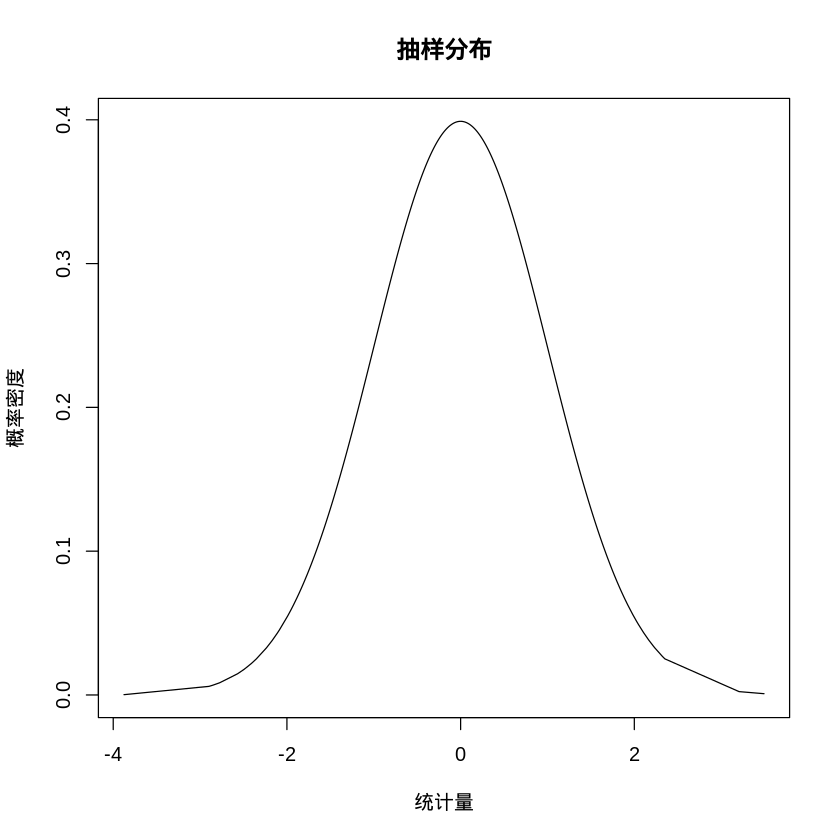

In [19]:
a<-rnorm(1000,0,1)
plot(a[order(a)],dnorm(a[order(a)]),type="l",main="抽样分布",xlab="统计量",ylab="概率密度")

In [3]:
###############利用bootstrap模拟独立样本均值差的抽样分布
par(mfrow=c(2,1),mar=c(4,4,4,4))
set.seed(12345)
Pop1<-rnorm(10000,mean=2,sd=2)   ###两总体方差相等
Pop2<-rnorm(10000,mean=10,sd=2)

In [4]:
Diff<-vector()
Sdx1<-vector()
Sdx2<-vector()
for(i in 1:2000){
 x1<-sample(Pop1,size=100,replace=TRUE) # 从总体为100000种随机有放回抽100个样本
 x2<-sample(Pop2,size=120,replace=TRUE) # 从总体为100000种随机有放回抽120个样本
 Diff<-c(Diff,(mean(x1)-mean(x2))) # 样本均值的差
 Sdx1<-c(Sdx1,sd(x1)) # 样本的standard deviation
 Sdx2<-c(Sdx2,sd(x2))
}

[1] 1.992889

[1] 1.970564

[1] 3.923306

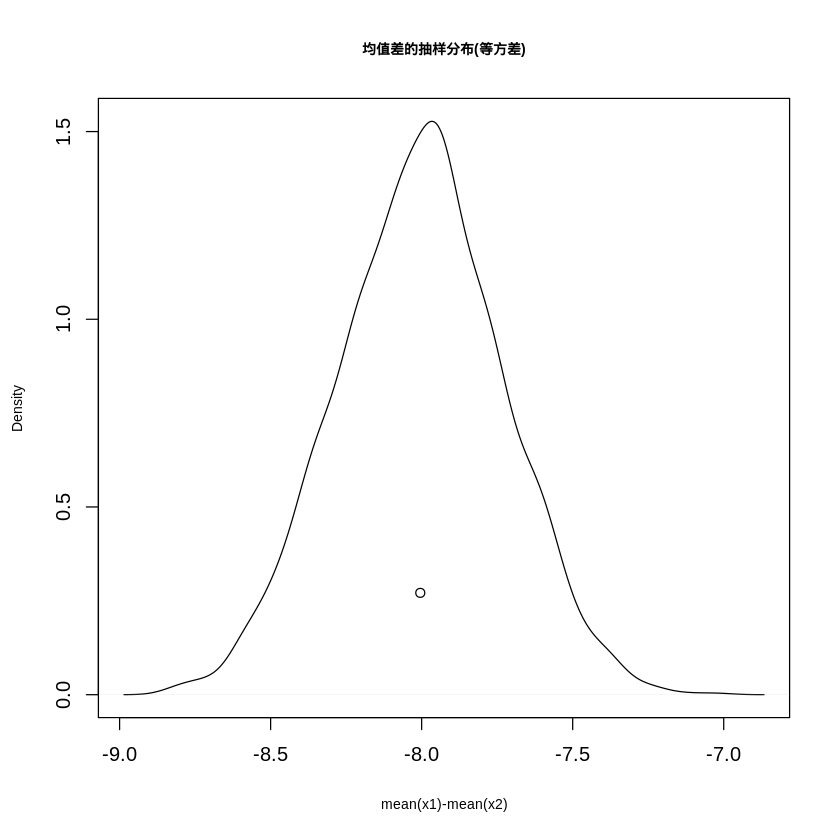

In [5]:
## 样本均值差的概率密度分布
plot(density(Diff),xlab="mean(x1)-mean(x2)",ylab="Density",main="均值差的抽样分布(等方差)",cex.main=0.7,cex.lab=0.7) 
#?density
# 均值差的均值 和 标准偏差
points(mean(Diff),sd(Diff),pch=1,col=1)
S1<-mean(Sdx1)
S2<-mean(Sdx2)
S1
S2
Sp<-((100-1)*S1^2+(120-1)*S2^2)/(100+120-2)
Sp
#points((2-10),sqrt(Sp/100+Sp/120),pch=2,col=2)

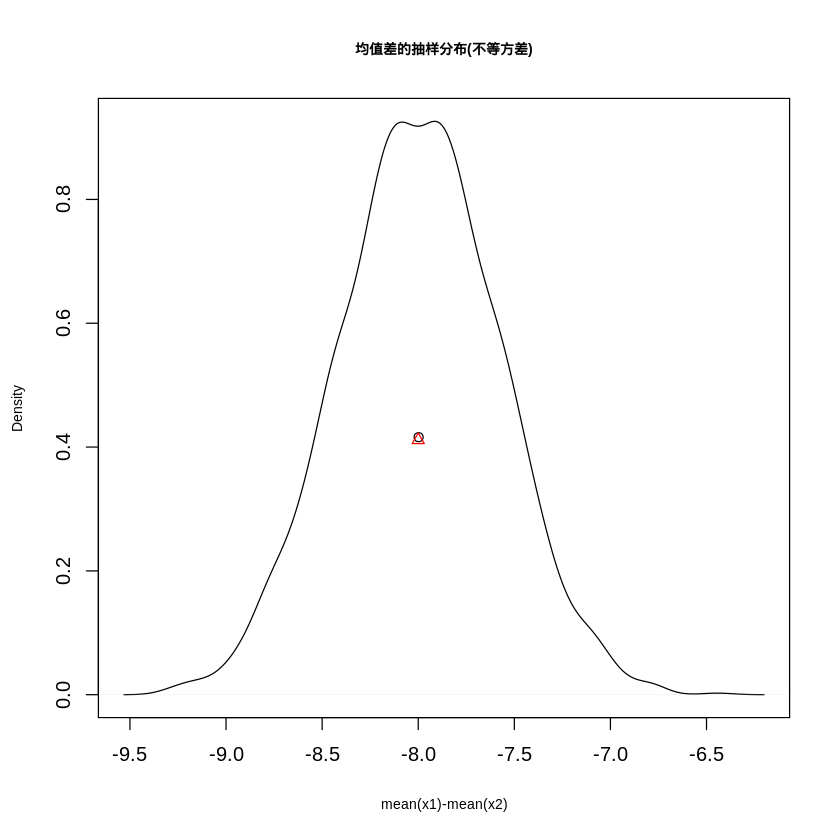

In [71]:
set.seed(12345)
Pop1<-rnorm(10000,mean=2,sd=2)    ###两总体方差不等
Pop2<-rnorm(10000,mean=10,sd=4)
Diff<-vector()
Sdx1<-vector()
Sdx2<-vector()
for(i in 1:2000){
 x1<-sample(Pop1,size=100,replace=TRUE)
 x2<-sample(Pop2,size=120,replace=TRUE)
 Diff<-c(Diff,(mean(x1)-mean(x2)))
 Sdx1<-c(Sdx1,sd(x1))
 Sdx2<-c(Sdx2,sd(x2))
 }
plot(density(Diff),xlab="mean(x1)-mean(x2)",ylab="Density",main="均值差的抽样分布(不等方差)",cex.main=0.7,cex.lab=0.7) 
points(mean(Diff),sd(Diff),pch=1,col=1)
S1<-mean(Sdx1)
S2<-mean(Sdx2)
points((2-10),sqrt(S1^2/100+S2^2/120),pch=2,col=2)



In [57]:
#############独立样本均值检验示例
Forest<-read.table(file="data/ForestData.txt",header=TRUE,sep="	")

Forest$month<-factor(Forest$month,levels=c("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))

Tmp<-subset(Forest,Forest$month=="jan" | Forest$month=="aug")
#str(Tmp)
#length(Tmp$month) # df = 186-2=184
jan_temp <- Forest[Forest$month=="jan","temp"]
aug_temp <- Forest[Forest$month=="aug","temp"]

jan_len <- length(jan_temp)
aug_len <-length(aug_temp)

mean(jan_temp)
temp_mean <- mean(jan_temp)-mean(aug_temp)
temp_mean
Sp <- ((jan_len-1)*sd(jan_temp)^2+(aug_len-1)*sd(aug_temp)^2)/(jan_len+aug_len-2)
sd_ <- sqrt(Sp/jan_len+Sp/aug_len)

# H0 两样本均值差的平均值=0
# 计算得两样本均值差的平均值= -16.38152
# 
round((temp_mean-0)/sd_,4)
t.test(temp~month,data=Tmp,paired=FALSE,var.equal=TRUE)

t.test(temp~month,data=Tmp,paired=FALSE,var.equal=FALSE)

[1] 5.25

[1] -16.38152

[1] -4.8063


	Two Sample t-test

data:  temp by month
t = -4.8063, df = 184, p-value = 3.184e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -23.106033  -9.657011
sample estimates:
mean in group jan mean in group aug 
          5.25000          21.63152 



	Welch Two Sample t-test

data:  temp by month
t = -45.771, df = 177.49, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -17.08782 -15.67522
sample estimates:
mean in group jan mean in group aug 
          5.25000          21.63152 
